In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_excel('/content/pollutiondata.xlsx')
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [7]:
df.columns

Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
Date,0
Month,0
Year,0
Holidays_Count,0
Days,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0


In [10]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [11]:
df = df.drop(['Date', 'Days'], axis=1)


In [12]:
df.head()

,Month,Year,Holidays_Count,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,2021,0,408.80,442.42,160.61,12.95,2.77,43.19,462
1,1,2021,0,404.04,561.95,52.85,5.18,2.60,16.43,482
2,1,2021,1,225.07,239.04,170.95,10.93,1.40,44.29,263
3,1,2021,0,89.55,132.08,153.98,10.42,1.01,49.19,207
4,1,2021,0,54.06,55.54,122.66,9.70,0.64,48.88,149


In [13]:
df.describe()

,Month,Year,Holidays_Count,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,6.522930,2022.501027,0.189596,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,3.449884,1.118723,0.392116,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,2021.000000,0.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,4.000000,2022.000000,0.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,7.000000,2023.000000,0.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,10.000000,2024.000000,0.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,12.000000,2024.000000,1.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [14]:
def aqi_to_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['AQI'].apply(aqi_to_category)


In [15]:
# drop original aqi numeric column

df.drop('AQI', axis=1, inplace=True)


In [16]:
X = df.drop('AQI_Category', axis=1)
y = df['AQI_Category']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [19]:
y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

        Good       1.00      0.60      0.75        10
    Moderate       0.83      0.82      0.83        85
        Poor       0.78      0.70      0.74        70
Satisfactory       0.78      0.93      0.85        58
      Severe       0.89      0.42      0.57        19
   Very Poor       0.65      0.78      0.71        51

    accuracy                           0.77       293
   macro avg       0.82      0.71      0.74       293
weighted avg       0.79      0.77      0.77       293

[[ 6  0  0  4  0  0]
 [ 0 70  4 11  0  0]
 [ 0  9 49  0  0 12]
 [ 0  4  0 54  0  0]
 [ 0  1  0  0  8 10]
 [ 0  0 10  0  1 40]]


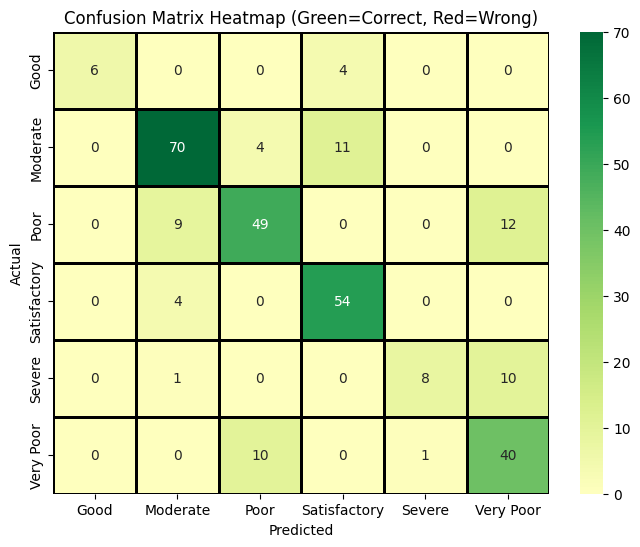

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your confusion matrix
conf_matrix = np.array([
    [6, 0, 0, 4, 0, 0],
    [0, 70, 4, 11, 0, 0],
    [0, 9, 49, 0, 0, 12],
    [0, 4, 0, 54, 0, 0],
    [0, 1, 0, 0, 8, 10],
    [0, 0, 10, 0, 1, 40]
])

classes = ["Good", "Moderate", "Poor", "Satisfactory", "Severe", "Very Poor"]

# Create a custom color map matrix: green for correct, red for wrong
color_matrix = np.zeros_like(conf_matrix, dtype=float)

# Normalize values for color intensity
max_val = conf_matrix.max()
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if i == j:
            # Correct predictions → green intensity
            color_matrix[i, j] = conf_matrix[i, j] / max_val
        else:
            # Wrong predictions → red intensity
            color_matrix[i, j] = -conf_matrix[i, j] / max_val  # negative for red

plt.figure(figsize=(8,6))

# Use diverging colormap: green = correct, red = wrong
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=classes, yticklabels=classes,
            cmap="RdYlGn", center=0, linewidths=1, linecolor='black')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap (Green=Correct, Red=Wrong)")
plt.show()



/tmp/ipython-input-2727548630.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=correct_preds, palette="Greens")


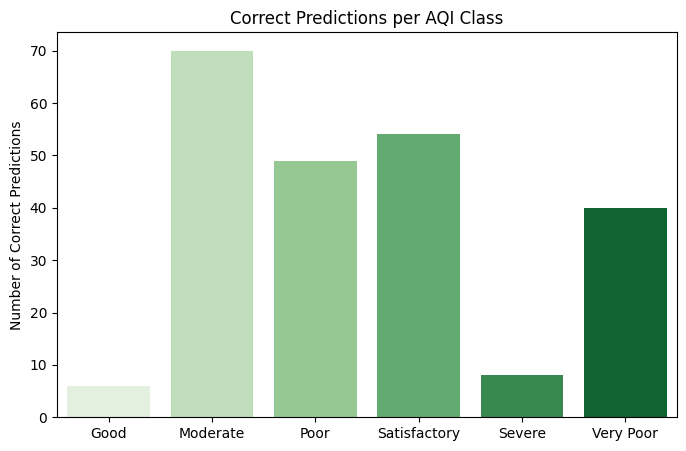

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix
conf_matrix = np.array([
    [6, 0, 0, 4, 0, 0],
    [0, 70, 4, 11, 0, 0],
    [0, 9, 49, 0, 0, 12],
    [0, 4, 0, 54, 0, 0],
    [0, 1, 0, 0, 8, 10],
    [0, 0, 10, 0, 1, 40]
])

classes = ["Good", "Moderate", "Poor", "Satisfactory", "Severe", "Very Poor"]

# Number of correct predictions per class
correct_preds = np.diag(conf_matrix)

# Simple bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=classes, y=correct_preds, palette="Greens")
plt.ylabel("Number of Correct Predictions")
plt.title("Correct Predictions per AQI Class")
plt.show()

